<a href="https://colab.research.google.com/github/shahanama/Stroke-Prediction/blob/main/Stroke_prediction(SMOTE_used).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries for EDA and preprocessing
 
import numpy as np
import pandas as pd
#from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/healthcare-dataset-stroke-data.csv.xls')

In [ ]:
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# drop features that are not required, then get statistics of numerical attributes
df.drop(['id'],axis=1).describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
#describe categorical features 
df.describe(exclude=['float','int64'])

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [ ]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

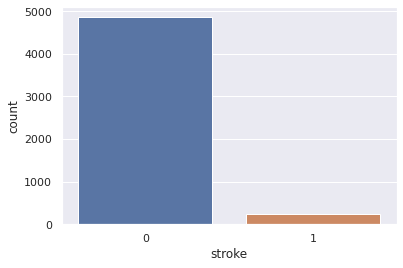

In [ ]:
df['stroke'].value_counts()
sns.countplot(x='stroke',data=df)


In [ ]:
df.drop(['id'],axis=1,inplace=True)


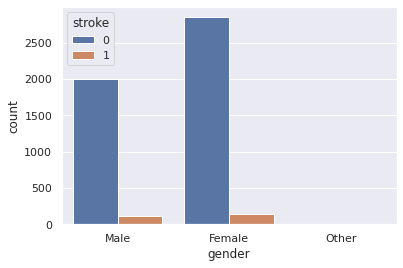

In [ ]:
#coutplot from seaborn can be used for basic EDA
#Count Plot of Categorical feature 
sns.countplot(x='gender',hue='stroke',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Stroke / Hypertension')

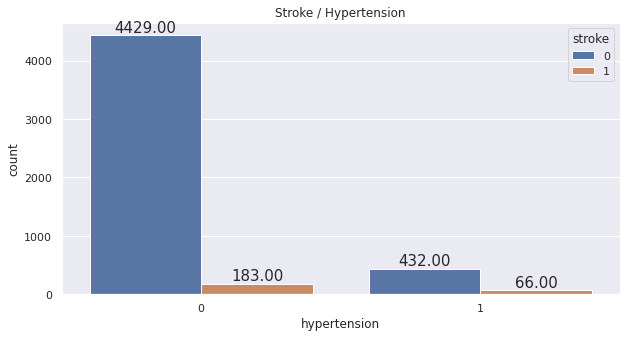

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
h_plot = sns.countplot('hypertension',hue='stroke',data=df)
for p in h_plot.patches:
  h_plot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2, 
                  p.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
plt.title('Stroke / Hypertension')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Stroke / Heart Disease')

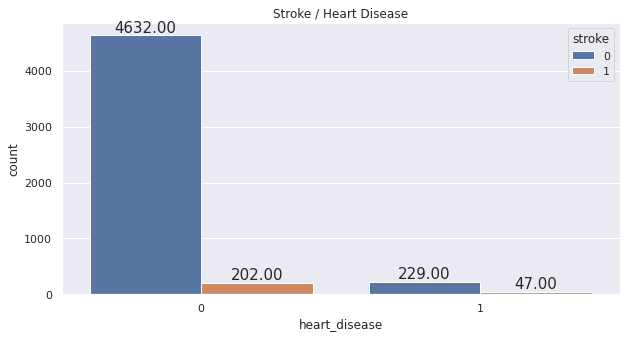

In [ ]:
hd_plot = sns.countplot('heart_disease',hue='stroke',data=df)
for p in hd_plot.patches:
  hd_plot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2, 
                  p.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
  
plt.title('Stroke / Heart Disease')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Stroke / Married or not')

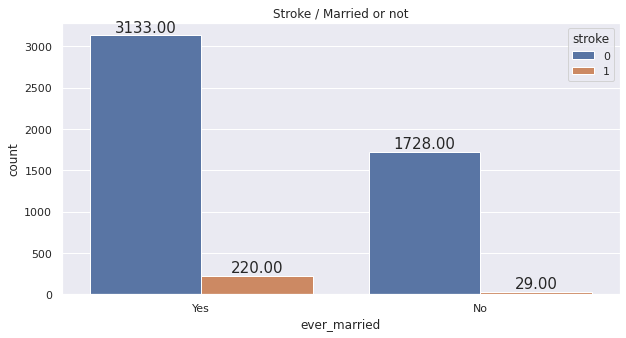

In [ ]:
m_plot = sns.countplot('ever_married',hue='stroke',data=df)
for p in m_plot.patches:
  m_plot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2, 
                  p.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
  
plt.title('Stroke / Married or not')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Stroke / Work types')

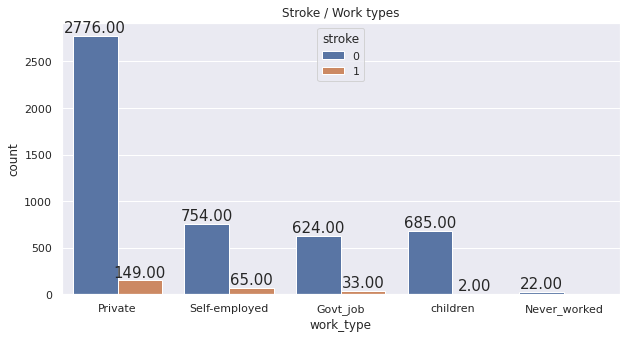

In [ ]:
w_plot = sns.countplot('work_type',hue='stroke',data=df)
for p in w_plot.patches:
  w_plot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2, 
                  p.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
  
plt.title('Stroke / Work types')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Stroke / Residence type')

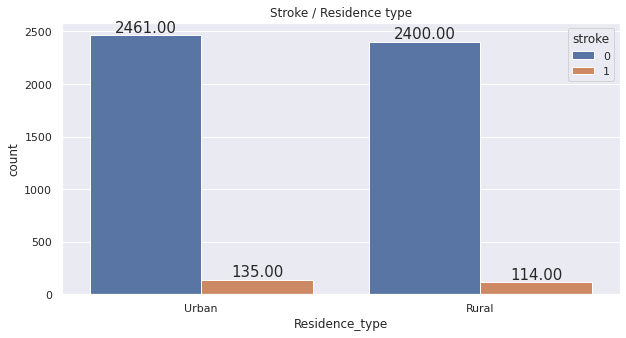

In [ ]:
R_plot = sns.countplot('Residence_type',hue='stroke',data=df)
for p in R_plot.patches:
  R_plot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2, 
                  p.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
  
plt.title('Stroke / Residence type')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Stroke / Smoking status')

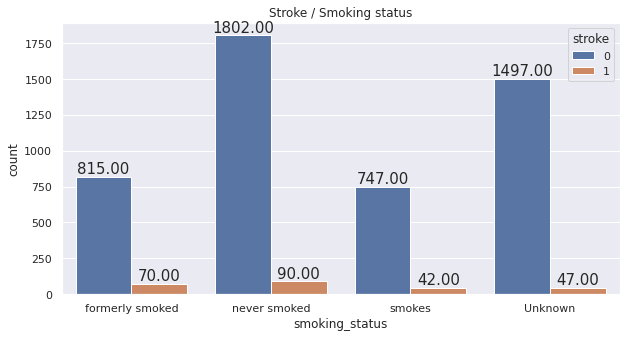

In [ ]:
s_plot = sns.countplot('smoking_status',hue='stroke',data=df)
for p in s_plot.patches:
  s_plot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2, 
                  p.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')
  
plt.title('Stroke / Smoking status')

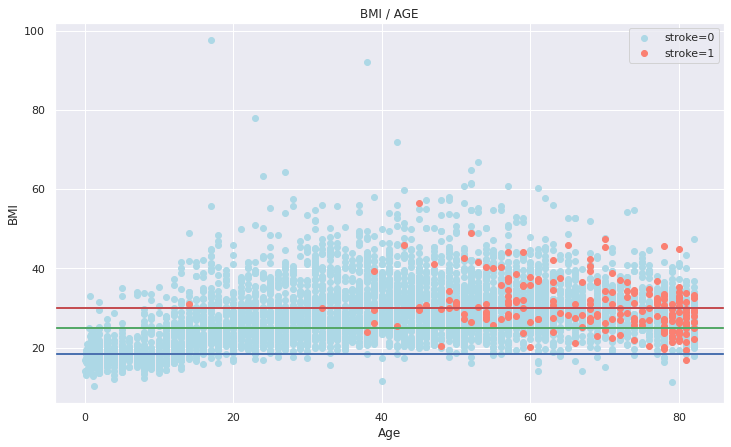

In [ ]:
plt.figure(figsize=(12, 7))
plt1=plt.scatter(df.age[df.stroke==0],df.bmi[df.stroke==0],c="lightblue") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt2=plt.scatter(df.age[df.stroke==1], df.bmi[df.stroke==1], c="salmon") # axis always come as (x, y)

# Add some helpful info
plt.axhline(y=24.9, linewidth=2, color='g', ls='-')
plt.axhline(y=18.5, linewidth=2, color='b', ls='-')
plt.axhline(y=29.9, linewidth=2, color='r', ls='-')
plt.title("Stroke in function of Age and Hyper tension(BMI)")
plt.ylabel('BMI')
plt.xlabel('Age')
plt.title('BMI / AGE')
plt.legend((plt1,plt2),('stroke=0','stroke=1'))
plt.show()

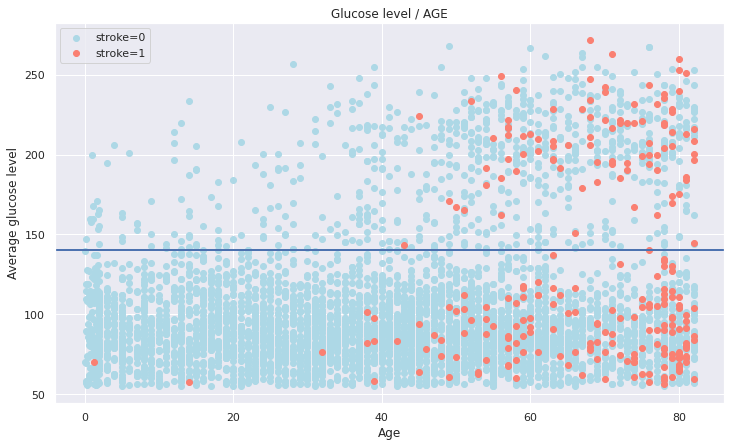

In [ ]:
plt.figure(figsize=(12, 7))
plt1=plt.scatter(df.age[df.stroke==0],df.avg_glucose_level[df.stroke==0],c="lightblue") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt2=plt.scatter(df.age[df.stroke==1], df.avg_glucose_level[df.stroke==1], c="salmon") # axis always come as (x, y)

# Add some helpful info
plt.title("Stroke in function of Age and average Glucose level")
plt.ylabel('Average glucose level')
plt.xlabel('Age')
plt.title('Glucose level / AGE')
plt.legend((plt1,plt2),('stroke=0','stroke=1'))
plt.axhline(y=140, linewidth=2, color='b', ls='-')
plt.show()

In [ ]:
len(df[(df['avg_glucose_level']>140)])

821

In [ ]:
#correlation matrix
plt.figure(figsize=(10, 6))

heatmap=sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True,cmap='BrBG')

In [ ]:
df.fillna(value=df['bmi'].mean(),inplace=True)

In [ ]:
#importing OneHotEncoder for encoding categorical variables
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
encoded =  pd.DataFrame(ohe.fit_transform(df[['gender','ever_married','work_type',
                       'Residence_type','smoking_status']]).toarray())
df=pd.concat([df,encoded],axis=1)

In [ ]:
df.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df.drop(['gender','ever_married','work_type','Residence_type','smoking_status'],inplace=True,axis=1)


In [ ]:
df.head()


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,67.0,0,1,228.69,36.600000,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,61.0,0,0,202.21,28.893237,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,80.0,0,1,105.92,32.500000,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,49.0,0,0,171.23,34.400000,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,79.0,1,0,174.12,24.000000,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
#scaling of numerical variables
from sklearn.preprocessing import StandardScaler
features= df[['age','hypertension','heart_disease','avg_glucose_level','bmi']]
features=pd.DataFrame(StandardScaler().fit_transform(features),index=features.index,columns=features.columns)
#col=df[['BAD','REASON','JOB']]
df.drop(['age','hypertension','heart_disease','avg_glucose_level','bmi'],axis=1,inplace=True)
df=pd.concat([features,df],axis=1)
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.051434,-0.328602,4.185032,2.706375,1.001234e+00,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.786070,-0.328602,-0.238947,2.121559,1.384666e-15,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.626390,-0.328602,4.185032,-0.005028,4.685773e-01,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.255342,-0.328602,-0.238947,1.437358,7.154182e-01,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.582163,3.043196,-0.238947,1.501184,-6.357112e-01,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1.626390,3.043196,-0.238947,-0.494658,1.384666e-15,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5106,1.670617,-0.328602,-0.238947,0.420775,1.442949e+00,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5107,-0.363842,-0.328602,-0.238947,-0.511443,2.217363e-01,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5108,0.343796,-0.328602,-0.238947,1.328257,-4.278451e-01,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
class_0,class_1 = df.stroke.value_counts()

# Divide by class
df_class_0 = df[df['stroke'] == 0]
df_class_1 = df[df['stroke'] == 1]

In [ ]:
X=df.drop('stroke',axis=1)
y=df['stroke']

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE 
smote= SMOTE(sampling_strategy='minority')
X_sm,y_sm =smote.fit_sample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
import collections
unique, counts = np.unique(y_sm, return_counts=True)
collections.Counter(y_sm)

Counter({0: 4861, 1: 4861})

In [ ]:
#splitting dataset into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_sm,y_sm,test_size=0.20,random_state=30)


Results for Logistic Regression

Confusion matrix:

 [[738 236]
 [144 827]] 

Classification report:

               precision    recall  f1-score   support

           0       0.84      0.76      0.80       974
           1       0.78      0.85      0.81       971

    accuracy                           0.80      1945
   macro avg       0.81      0.80      0.80      1945
weighted avg       0.81      0.80      0.80      1945


Accuracy Score:  0.8046272493573264


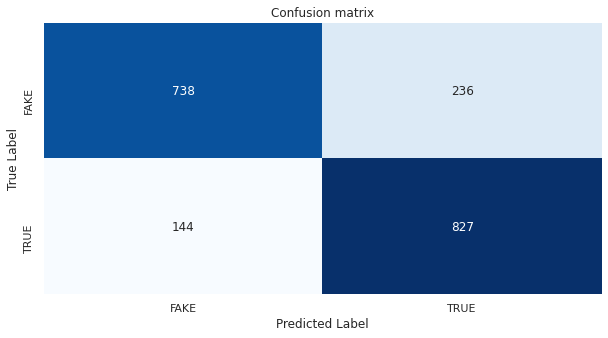

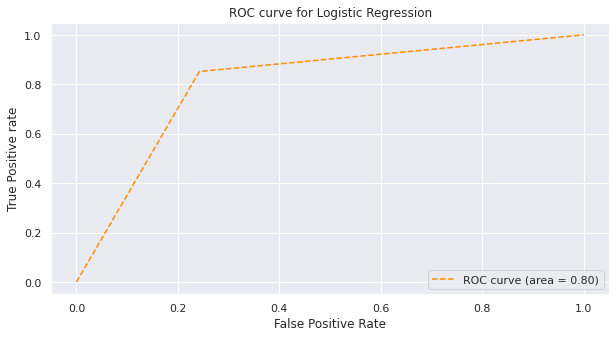


Results for K-Nearest Neighbors

Confusion matrix:

 [[816 158]
 [ 15 956]] 

Classification report:

               precision    recall  f1-score   support

           0       0.98      0.84      0.90       974
           1       0.86      0.98      0.92       971

    accuracy                           0.91      1945
   macro avg       0.92      0.91      0.91      1945
weighted avg       0.92      0.91      0.91      1945


Accuracy Score:  0.9110539845758355


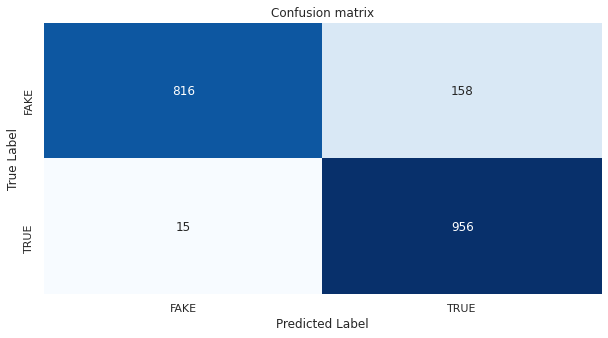

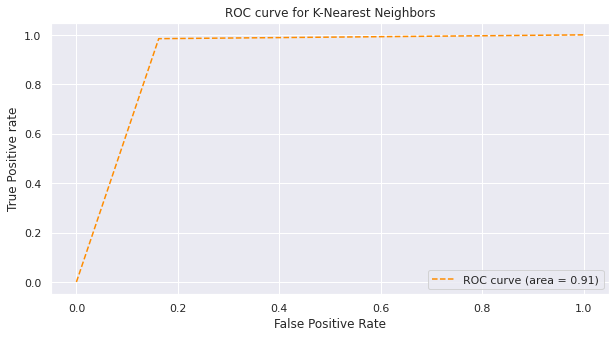


Results for Random Forest Classifier

Confusion matrix:

 [[941  33]
 [ 37 934]] 

Classification report:

               precision    recall  f1-score   support

           0       0.96      0.97      0.96       974
           1       0.97      0.96      0.96       971

    accuracy                           0.96      1945
   macro avg       0.96      0.96      0.96      1945
weighted avg       0.96      0.96      0.96      1945


Accuracy Score:  0.9640102827763496


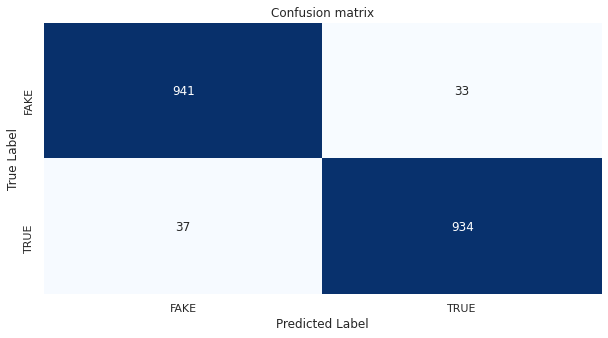

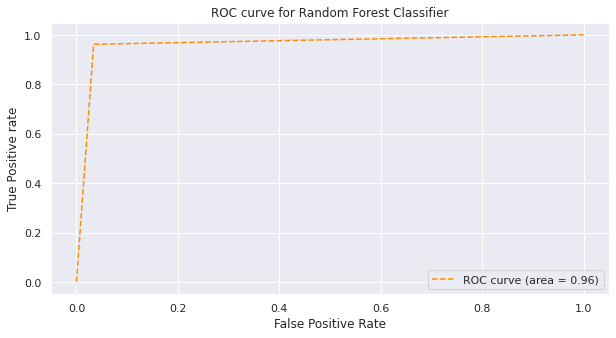

In [ ]:
 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,auc,accuracy_score
models = [['Logistic Regression',LogisticRegression(max_iter=200)],['K-Nearest Neighbors',
                                      KNeighborsClassifier()],['Random Forest Classifier',RandomForestClassifier()]]
 
results = {}
 
for i in range(0,len(models)):
  classifier = models[i][1]
  classifier.fit(x_train,y_train)
  y_pred = classifier.predict(x_test)
  y_prob = classifier.predict_proba(x_test)[:,1]
 
  print(f'\nResults for {models[i][0]}\n')
  print('Confusion matrix:\n\n', confusion_matrix(y_test, y_pred), '\n')
  print('Classification report:\n\n', classification_report(y_test, y_pred))
  print("\nAccuracy Score: ",accuracy_score(y_test, y_pred))
 
  #confusiin matrix
  cm=confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot=True, fmt='d', xticklabels=['FAKE', 'TRUE'], yticklabels=['FAKE', 'TRUE'],cmap=plt.cm.Blues, cbar=False)
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.title('Confusion matrix')
  plt.show()
 
  #ROC curve
  fpr,tpr,thresh = roc_curve(y_test,y_pred,pos_label=1)
  plt.plot(fpr, tpr, linestyle='--',color='darkorange', label='ROC curve (area = %0.2f)' % auc(fpr,tpr))
  # title
  plt.title(f'ROC curve for {models[i][0]}')
  # x label
  plt.xlabel('False Positive Rate')
  # y label
  plt.ylabel('True Positive rate')
  plt.legend(loc="lower right")
  plt.show()